In [1]:
import pandas as pd
import numpy as np
import requests
import io

from csv import reader
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_file(url): 
    reader=requests.get(url).content
    reader=pd.read_csv(io.StringIO(reader.decode('utf-8')))# Reading the CSV into Pnadas
    return reader 

In [3]:
def save_file(name):            # Save File as CSV
    pd.to_csv(name)

In [4]:
def column_edit(dataset):                  # Editing Column Names
    final = [] 
    final_column = []         
    column = dataset.columns.str.strip().str.split("/")
    for data in column:
        data[0] = (data[0].replace("1", "January").replace("2", "Feburary").replace("3", "March")
                   .replace("4", "April").replace("5", "May"))
    
    for data in column:
        if len(data) < 3:
            data[0:] = ['/'.join(data[0:])]
            final.append(data)
        else:
            del data[2]
            data[0:] = ['_'.join(data[0:])]
            final.append(data)
            
    for data in final:
        final_column.append(data[0])
    dataset.columns = final_column
    return dataset

In [5]:
def numbers_per_day(dataset, total):         # Regenerating Numbers per day
    datasets = dataset.copy()
    dat = []
    i = 0
    for data in dataset.columns[4:]:
        if data == "January_22":
            dat.append(data)
        else: 
            datasets[data] = dataset[data] - dataset[dat[i]]
            dat.append(data)
            i += 1
    datasets.iloc[1:, 4:] = datasets.iloc[1:, 4:].astype(int)
    datasets[total] = datasets.iloc[:, 4:].sum(axis=1)
    return datasets

In [6]:
url_confirmed="https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
confirmed = read_file(url_confirmed)

In [7]:
confirmed = column_edit(confirmed) # Editing column Names
confirmed

,Province/State,Country/Region,Lat,Long,January_22,January_23,January_24,January_25,January_26,January_27,...,May_3,May_4,May_5,May_6,May_7,May_8,May_9,May_10,May_11,May_12
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,795,803,820,832,842,850,856,868,872,876
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,748,750,751,751,752,752,754,755,755,758
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,35,35,36,36,36,43,43,45,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,16,23,174,174,187,208,208,208,208,208
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,10,12,22,25,25,34,34,51,56,65
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,3,3,3,8,8,8,11,11,11,11


In [8]:
confirmed_per_day = numbers_per_day(confirmed, total = "Total_confirmed") # Generating Numbers Per day
confirmed_per_day

,Province/State,Country/Region,Lat,Long,January_22,January_23,January_24,January_25,January_26,January_27,...,May_4,May_5,May_6,May_7,May_8,May_9,May_10,May_11,May_12,Total_confirmed
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,190,330,168,171,215,255,369,285,276,4963
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,8,17,12,10,8,6,12,4,4,876
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,174,190,159,185,187,189,165,168,176,6067
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,2,1,0,1,0,2,1,0,3,758
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,1,0,0,7,0,2,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,7,151,0,13,21,0,0,0,0,208
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2,10,3,0,9,0,17,5,9,65
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,5,0,0,3,0,0,0,11


In [9]:
url_death = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv"
death = read_file(url_death)   # Reading global Number of Deaths 


In [10]:
death = column_edit(death)                       # Editing Clomn Names

In [11]:
death_per_day = numbers_per_day(death, total = "Total_death") # Generating Numbers per day

In [12]:
death_per_day

,Province/State,Country/Region,Lat,Long,January_22,January_23,January_24,January_25,January_26,January_27,...,May_4,May_5,May_6,May_7,May_8,May_9,May_10,May_11,May_12,Total_death
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,5,5,9,2,3,6,5,2,5,127
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2,5,6,7,5,6,8,5,8,515
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,48
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,2,0,0,1,1,0,0,0,0,5
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,2,1,0,2,0,1,1,1,10
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [13]:
url_recovery = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv"
recovery = read_file(url_recovery)   # Reading Global recovery from Covid-19 per country

In [14]:
recovery = column_edit(recovery)                     # Editing Column Names

In [15]:
recovery_per_day = numbers_per_day(recovery, total = "Total_recovery")  # Generating Numbers per day

In [16]:
recovery_per_day[recovery_per_day["Country/Region"] == "Somalia"]


,Province/State,Country/Region,Lat,Long,January_22,January_23,January_24,January_25,January_26,January_27,...,May_4,May_5,May_6,May_7,May_8,May_9,May_10,May_11,May_12,Total_recovery
197,NaN,Somalia,5.1521,46.1996,0,0,0,0,0,0,...,17,14,12,19,0,4,8,3,5,126


In [17]:
death_ready = death_per_day[["Country/Region", "Total_death"]]                   # Preparing datas to be merged
recovery_ready = recovery_per_day[["Country/Region","Total_recovery"]].groupby("Country/Region").sum().reset_index()
confirmed_ready = confirmed_per_day[["Country/Region", "Total_confirmed"]]

In [18]:
confirmed_death = pd.concat([confirmed_ready, death_ready],axis =1, join = "inner" ) # Merging Datas using Conecnation

In [19]:
confirmed_death.head(12)

,Country/Region,Total_confirmed,Country/Region,Total_death
0,Afghanistan,4963,Afghanistan,127
1,Albania,876,Albania,31
2,Algeria,6067,Algeria,515
3,Andorra,758,Andorra,48
4,Angola,45,Angola,2
5,Antigua and Barbuda,25,Antigua and Barbuda,3
6,Argentina,6563,Argentina,319
7,Armenia,3538,Armenia,47
8,Australia,107,Australia,3
9,Australia,3059,Australia,45


In [20]:
confirmed_death = confirmed_death.T.drop_duplicates().T

In [21]:
confirmed_death

,Country/Region,Total_confirmed,Total_death
0,Afghanistan,4963,127
1,Albania,876,31
2,Algeria,6067,515
3,Andorra,758,48
4,Angola,45,2
...,...,...,...
261,Western Sahara,6,0
262,Sao Tome and Principe,208,5
263,Yemen,65,10
264,Comoros,11,1


In [22]:
recovery_ready

,Country/Region,Total_recovery
0,Afghanistan,610
1,Albania,682
2,Algeria,2998
3,Andorra,568
4,Angola,13
...,...,...
182,West Bank and Gaza,308
183,Western Sahara,6
184,Yemen,1
185,Zambia,117


In [23]:
confirmed_death = confirmed_death.groupby("Country/Region").sum().reset_index()

In [24]:
hey = confirmed_death["Country/Region"] == recovery_ready["Country/Region"]

In [25]:
combined = pd.concat([confirmed_death, recovery_ready], axis = 1, join = "inner")

In [26]:
combined = combined.T.drop_duplicates().T
combined

,Country/Region,Total_confirmed,Total_death,Total_recovery
0,Afghanistan,4963,127,610
1,Albania,876,31,682
2,Algeria,6067,515,2998
3,Andorra,758,48,568
4,Angola,45,2,13
...,...,...,...,...
182,West Bank and Gaza,375,2,308
183,Western Sahara,6,0,6
184,Yemen,65,10,1
185,Zambia,441,7,117


In [27]:
country_to_continent = pd.read_csv("countryContinent.csv", encoding="UTF-8") # Importing Continent and Country

In [28]:
country_to_continent.head(12)

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,≈land Islands,AX,ALA,248.0,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12.0,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16.0,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0
5,Andorra,AD,AND,20.0,ISO 3166-2:AD,Europe,Southern Europe,150.0,39.0
6,Angola,AO,AGO,24.0,ISO 3166-2:AO,Africa,Middle Africa,2.0,17.0
7,Anguilla,AI,AIA,660.0,ISO 3166-2:AI,Americas,Caribbean,19.0,29.0
8,Antarctica,AQ,ATA,10.0,ISO 3166-2:AQ,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,AG,ATG,28.0,ISO 3166-2:AG,Americas,Caribbean,19.0,29.0


In [29]:
country_continent = country_to_continent[["country", "continent", "sub_region"]]  

In [30]:
country_continent.describe()

,country,continent,sub_region
count,252,243,240
unique,252,5,22
top,Thailand,Africa,Caribbean
freq,1,58,28


In [31]:
country_continent["continent"].value_counts()

Africa      58
Americas    55
Asia        53
Europe      52
Oceania     25
Name: continent, dtype: int64

In [32]:
Africa = country_continent[country_continent["continent"] == "Africa"][["country", "continent"]]

In [33]:
Africa = Africa["country"].to_list()
Africa=[each_string.lower() for each_string in Africa]

In [34]:
America = country_continent[country_continent["continent"] == "Americas"][["country", "continent"]]

In [35]:
America = America["country"].tolist()
America =[each_string.lower() for each_string in America]

In [36]:
Europe = country_continent[country_continent["continent"] == "Europe"][["country", "continent"]]

In [37]:
Europe = Europe["country"].to_list()
Europe = [each_string.lower() for each_string in Europe]

In [38]:
Asia = country_continent[country_continent["continent"] == "Asia"][["country", "continent"]]

In [39]:
Asia = Asia["country"].to_list()
Asia = [each_string.lower() for each_string in Asia]

In [40]:
Oceania = country_continent[country_continent["continent"] == "Oceania"][["country", "continent"]]

In [41]:
Oceania = Oceania["country"].to_list()
Oceania =[each_string.lower() for each_string in Oceania]

In [42]:
country_continent[country_continent["continent"] == None][["country", "continent"]]

,country,continent


In [43]:
with pd.option_context('mode.chained_assignment', None): #Avoiding Chained Assignement 
    def continent(val):                                   #Categorizng the 
        if val.lower() in Africa:
            return "Africa"
        elif val.lower() in America:
            return "America"
        elif val.lower() in Asia:
            return "Asia"
        elif val.lower() in Europe:
            return "Europe"
        elif val.lower() in Oceania:
            return "Oceania"
        else:
            return "Others"
    combined["Continent"] = combined["Country/Region"].str.strip().apply(continent).copy()

In [44]:
combined[combined["Continent"] == "Africa"]

,Country/Region,Total_confirmed,Total_death,Total_recovery,Continent
2,Algeria,6067,515,2998,Africa
4,Angola,45,2,13,Africa
18,Benin,327,2,76,Africa
22,Botswana,24,1,17,Africa
26,Burkina Faso,766,51,588,Africa
28,Burundi,15,1,7,Africa
29,Cabo Verde,267,2,58,Africa
31,Cameroon,2689,125,1524,Africa
33,Central African Republic,143,0,10,Africa
34,Chad,357,40,76,Africa


In [45]:
combined[combined["Country/Region"] == "US"]

,Country/Region,Total_confirmed,Total_death,Total_recovery,Continent
173,US,1369376,82356,230287,America


In [46]:
combined_group = combined.groupby("Continent").sum().reset_index()
combined_group

,Continent,Country/Region,Total_confirmed,Total_death,Total_recovery
0,Africa,AlgeriaAngolaBeninBotswanaBurkina FasoBurundiC...,69453,2395,23973
1,America,Antigua and BarbudaArgentinaBahamasBarbadosBel...,1844064,110723,422024
2,Asia,AfghanistanArmeniaAzerbaijanBahrainBangladeshB...,702851,22863,394482
3,Europe,AlbaniaAndorraAustriaBelarusBelgiumBosnia and ...,1635780,155825,644282
4,Oceania,AustraliaFijiNew ZealandPapua New Guinea,8503,119,7694
5,Others,Diamond PrincessMS ZaandamWest Bank and Gaza,1096,17,959


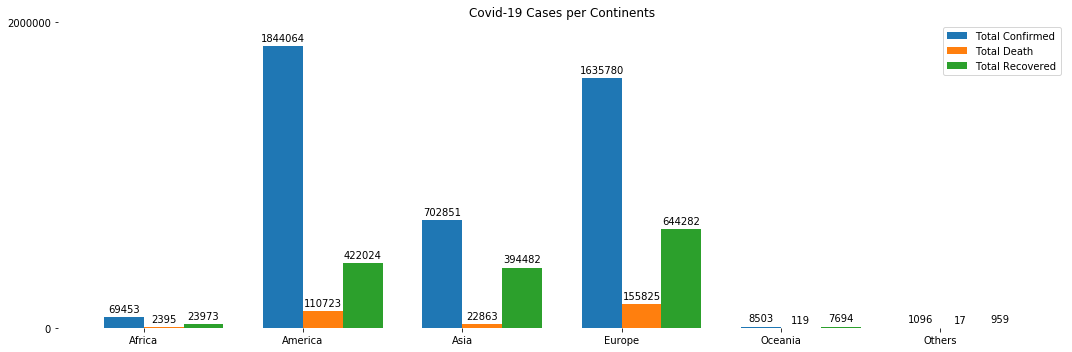

In [47]:
labels = combined_group["Continent"]
Total_confirmed = combined_group["Total_confirmed"]
Total_recovery = combined_group["Total_recovery"]
Total_death = combined_group["Total_death"]

x = np.arange(start=0, stop=12, step=2)             # the label locations
width = 0.5                          # the width of the bars

fig, ax = plt.subplots(figsize = (15,5))
rects1 = ax.bar(x - width/2, Total_confirmed, width, label='Total Confirmed')
rects2 = ax.bar(x + width/2, Total_death, width, label='Total Death')
rects3 = ax.bar(x + 3*(width/2) , Total_recovery, width, label = "Total Recovered")
# text for labels, title and custom x-axis tick labels, etc.
spines = ["bottom", "right", "left", "top"]
for spot in spines:
            ax.spines[spot].set_visible(False)
ax.set_title('Covid-19 Cases per Continents')
ax.set_yticks([0,2000000])
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Reacts to display height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [48]:
combined[combined["Continent"] == "Others"]

,Country/Region,Total_confirmed,Total_death,Total_recovery,Continent
48,Diamond Princess,712,13,651,Others
103,MS Zaandam,9,2,0,Others
182,West Bank and Gaza,375,2,308,Others
